# Loading data + Data Preprocessing

In [19]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset("diamonds")

In [20]:
df.sample(5)

carat        cut color clarity  depth  table  price     x     y     z
40067   0.43    Premium     G     VS2   59.1   60.0   1113  4.93  4.88  2.90
25134   2.01  Very Good     I     SI1   61.8   62.0  13691  7.98  8.07  4.96
2768    0.77      Ideal     D     SI1   60.8   57.0   3251  5.94  5.90  3.60
6673    1.23      Ideal     H      I1   61.8   56.0   4098  6.91  6.85  4.25
38683   0.30      Ideal     F    VVS1   61.6   57.0   1041  4.33  4.34  2.67

In [21]:
df.shape

(53940, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [23]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

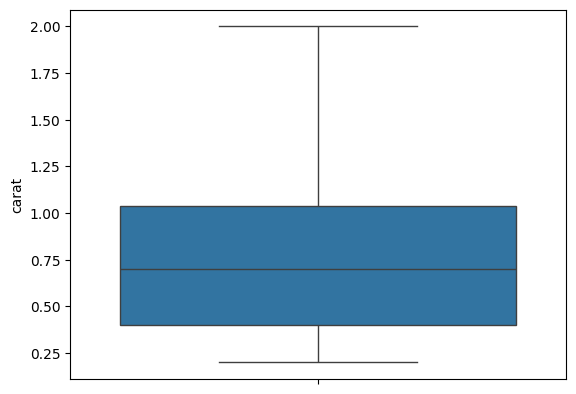

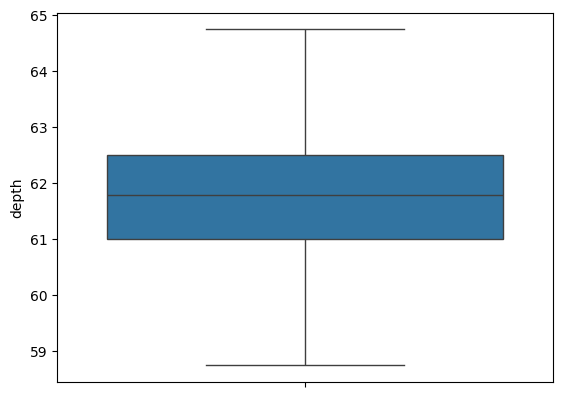

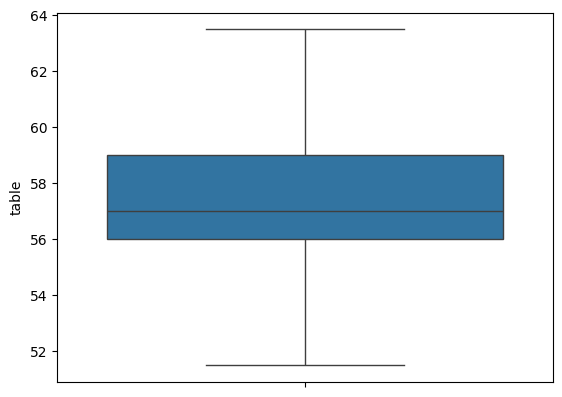

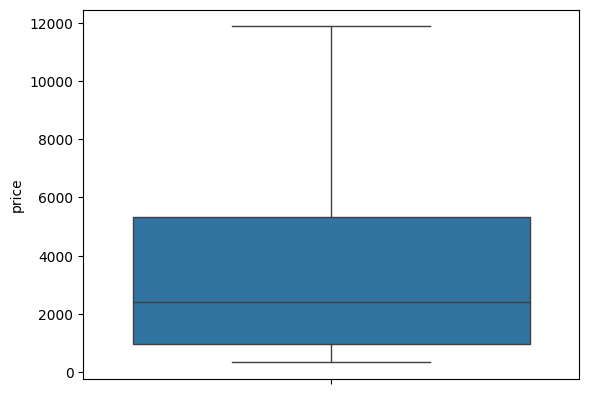

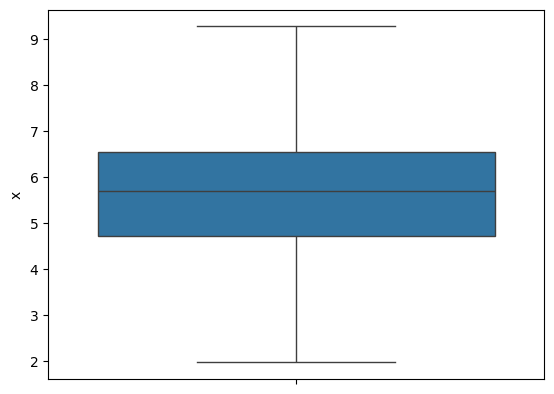

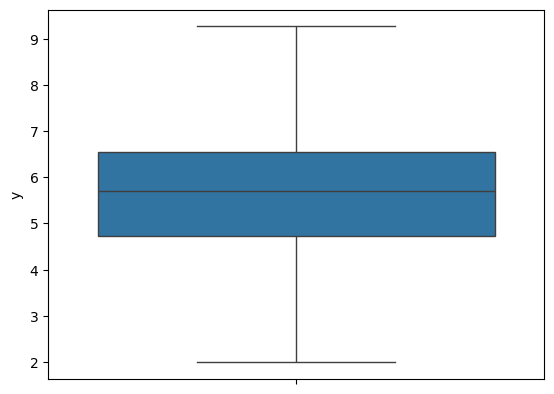

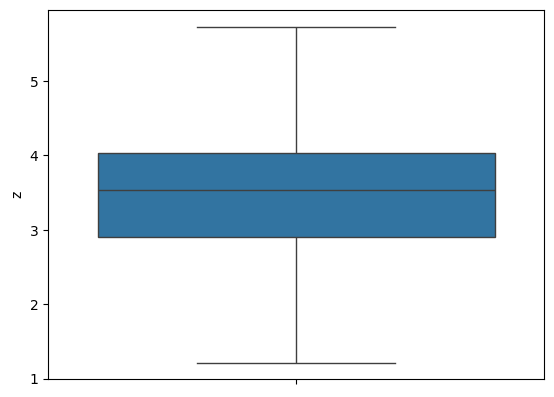

In [26]:
import matplotlib.pyplot as plt
for col in df.select_dtypes(include="number"):
  sns.boxplot(df[col])
  plt.show()

In [25]:
for col in df.select_dtypes(include="number").columns:
  q1, q3 = df[col].quantile([0.25, 0.75])
  iqr = q3-q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  df[col] = df[col].clip(lower, upper)

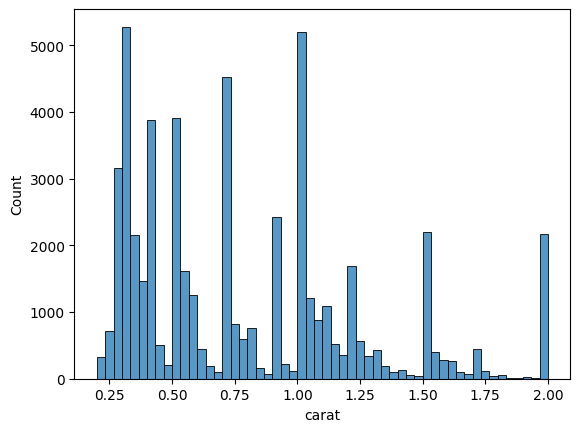

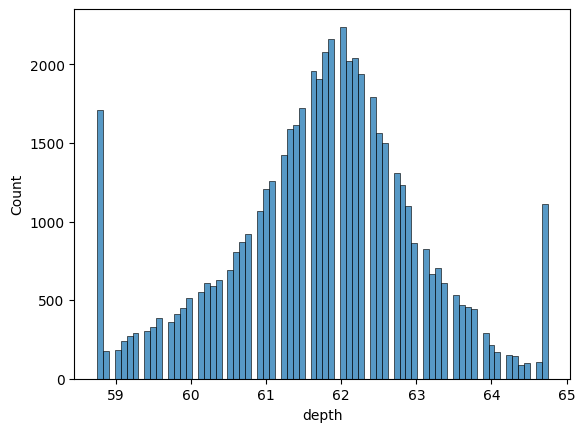

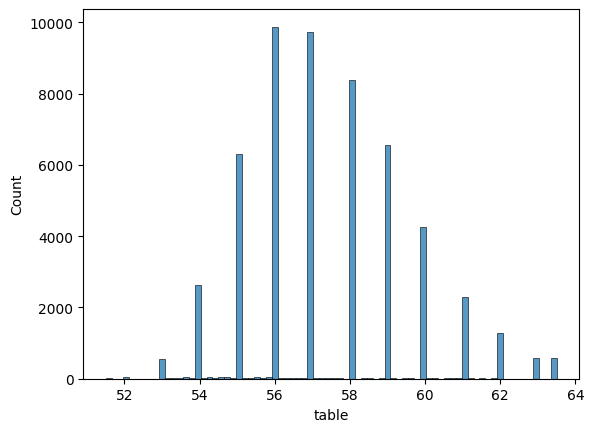

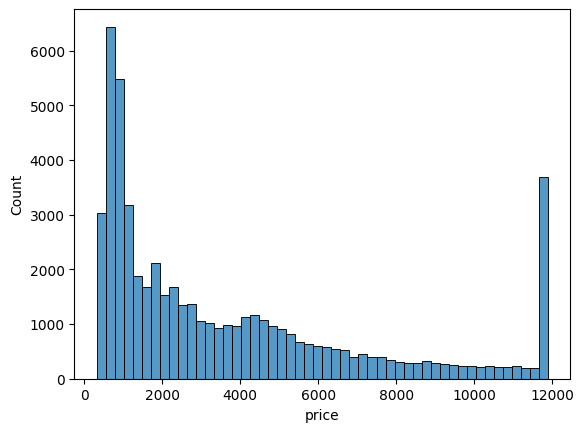

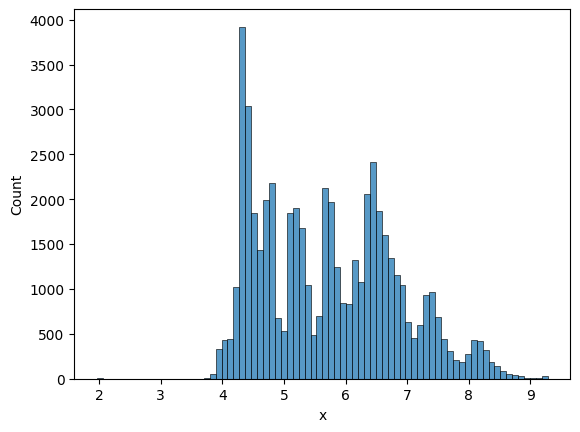

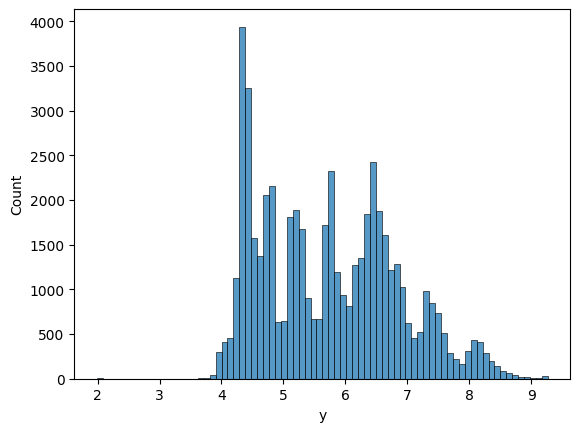

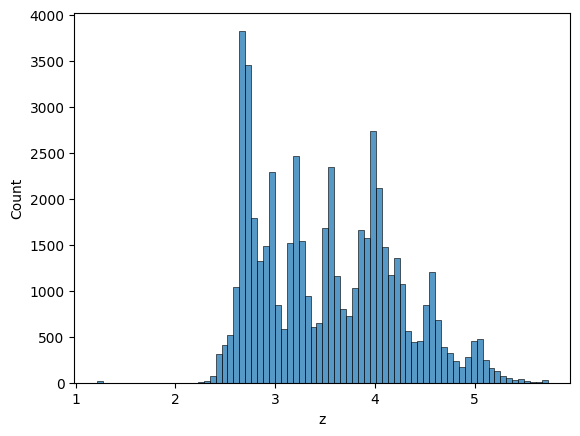

In [27]:
for col in df.select_dtypes(include="number"):
  sns.histplot(df[col])
  plt.show()

In [28]:
from sklearn.preprocessing import RobustScaler
num_cols = df.select_dtypes(include="number").columns

scaler =  RobustScaler()
df_scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

In [29]:
df[num_cols].head(3)

carat  depth  table  price     x     y     z
0   0.23  61.50   55.0  326.0  3.95  3.98  2.43
1   0.21  59.80   61.0  326.0  3.89  3.84  2.31
2   0.23  58.75   63.5  327.0  4.05  4.07  2.31

In [30]:
df_scaled.head(3)

carat     depth     table     price         x         y         z
0 -0.734375 -0.200000 -0.666667 -0.474367 -0.956284 -0.950549 -0.973451
1 -0.765625 -1.333333  1.333333 -0.474367 -0.989071 -1.027473 -1.079646
2 -0.734375 -2.033333  2.166667 -0.474138 -0.901639 -0.901099 -1.079646

In [31]:
cat_cols = df.select_dtypes(include="category").columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [32]:
df_encoded.head(3)

carat  depth  table  price     x     y     z  cut_Premium  cut_Very Good  \
0   0.23  61.50   55.0  326.0  3.95  3.98  2.43        False          False   
1   0.21  59.80   61.0  326.0  3.89  3.84  2.31         True          False   
2   0.23  58.75   63.5  327.0  4.05  4.07  2.31        False          False   

   cut_Good  ...  color_H  color_I  color_J  clarity_VVS1  clarity_VVS2  \
0     False  ...    False    False    False         False         False   
1     False  ...    False    False    False         False         False   
2      True  ...    False    False    False         False         False   

   clarity_VS1  clarity_VS2  clarity_SI1  clarity_SI2  clarity_I1  
0        False        False        False         True       False  
1        False        False         True        False       False  
2         True        False        False        False       False  

[3 rows x 24 columns]

In [33]:
df_final = pd.concat([df_scaled, df_encoded.drop(columns=num_cols)], axis=1)

In [34]:
df_final.head(3)

carat     depth     table     price         x         y         z  \
0 -0.734375 -0.200000 -0.666667 -0.474367 -0.956284 -0.950549 -0.973451   
1 -0.765625 -1.333333  1.333333 -0.474367 -0.989071 -1.027473 -1.079646   
2 -0.734375 -2.033333  2.166667 -0.474138 -0.901639 -0.901099 -1.079646   

   cut_Premium  cut_Very Good  cut_Good  ...  color_H  color_I  color_J  \
0        False          False     False  ...    False    False    False   
1         True          False     False  ...    False    False    False   
2        False          False      True  ...    False    False    False   

   clarity_VVS1  clarity_VVS2  clarity_VS1  clarity_VS2  clarity_SI1  \
0         False         False        False        False        False   
1         False         False        False        False         True   
2         False         False         True        False        False   

   clarity_SI2  clarity_I1  
0         True       False  
1        False       False  
2        False       False  

[3 rows x 24 columns]

# Applying clustering Algorithms

## Kmeans (before PCA)

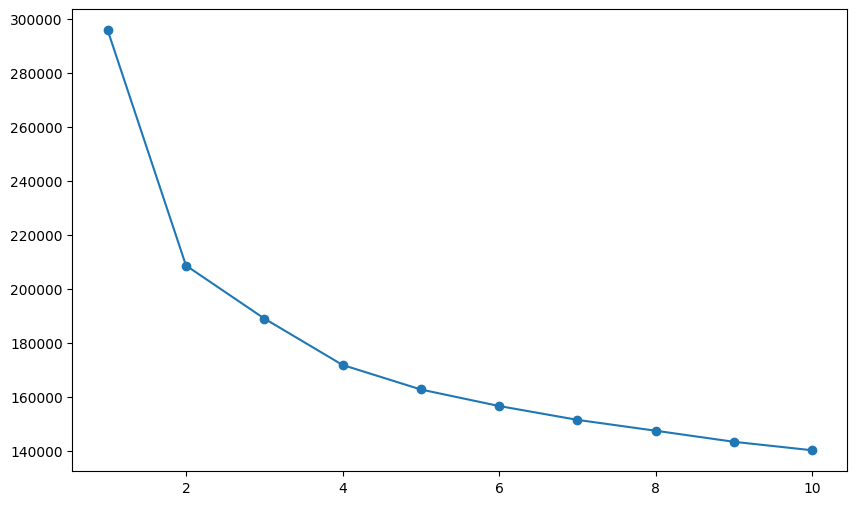

In [35]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, algorithm="lloyd", random_state=42)
  kmeans.fit(df_final)
  inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, algorithm="lloyd", random_state=42)
kmeans.fit(df_final)

KMeans(n_clusters=4, n_init=10, random_state=42)

<Axes: xlabel='carat', ylabel='price'>

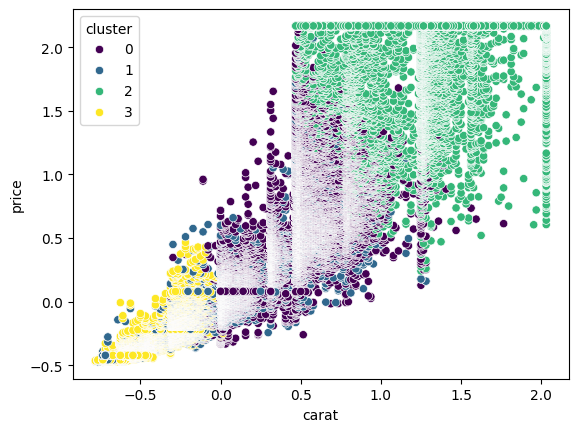

In [37]:
df_final['cluster'] = kmeans.labels_
sns.scatterplot(x='carat', y='price', hue='cluster', data=df_final, palette='viridis')

<Axes: xlabel='PC1', ylabel='PC2'>

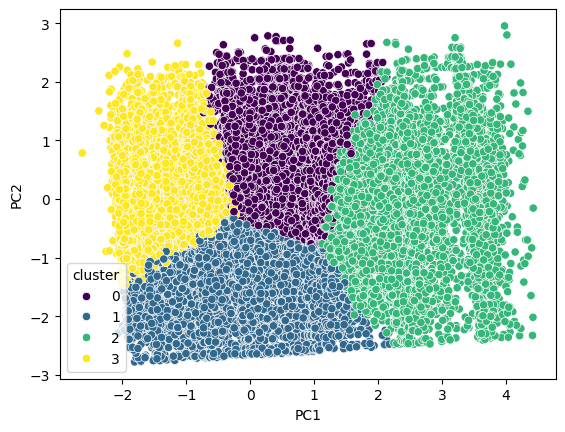

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final.drop(columns=['cluster']))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = kmeans.labels_
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')

In [39]:
import plotly.express as px
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_final.drop(columns=['cluster']))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster'] = kmeans.labels_

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='cluster')
fig.show()

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(df_final, kmeans.labels_)

np.float64(0.3079664937296494)

## Kmeans accuracy after PCA (accuracy improved)

In [41]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final.drop(columns=['cluster']))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

In [42]:
km = KMeans(n_clusters=5, init="k-means++")
y_pred = km.fit_predict(df_pca)
silhouette_score(df_pca, y_pred)

np.float64(0.4002055409643129)

## DBSCAN

In [45]:
# DBSCAN before PCA
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=14)
y_pred = dbscan.fit_predict(df_final)
silhouette_score(df_final, y_pred)

np.float64(0.2796773000440278)

In [44]:
# DBSCAN after PCA
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_pred = dbscan.fit_predict(df_pca)
silhouette_score(df_pca, y_pred)

np.float64(0.46026959279103685)

## Agglomerative Clustering

In [48]:
# Agglo before PCA
from sklearn.cluster import AgglomerativeClustering
df_sample = df_final.sample(n=5000)
agg = AgglomerativeClustering(n_clusters=5)
y_pred = agg.fit_predict(df_sample)
silhouette_score(df_sample, y_pred)

np.float64(0.2742730385267454)

In [47]:
# Agglo after PCA
from sklearn.cluster import AgglomerativeClustering
df_sample = df_pca.sample(n=5000)
agg = AgglomerativeClustering(n_clusters=5)
y_pred = agg.fit_predict(df_sample)
silhouette_score(df_sample, y_pred)

np.float64(0.363019050573161)